In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv('./datasets/final_labeled_df.csv')

In [26]:
# Basic Data Overview
print("Dataset shape:", df.shape)
print("\nFirst few rows of the data:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (199, 10)

First few rows of the data:
  Ticker  Mean Return  Mean Volatility  Momentum  Average Volume       10_MA  \
0   NVDA     0.004333         0.033188  5.351000     245254090.0  139.158000   
1    NIO     0.005627         0.047785 -0.608500      59255180.0    5.311000   
2    DJT     0.009823         0.065354  6.795500      57166180.0   34.066000   
3   TSLA     0.002823         0.036305 -3.737499      85775920.0  232.514003   
4      F     0.000909         0.016384  0.230000      47297160.0   11.077000   

        20_MA Growth Label Volatility Label Momentum Label  
0  133.807000       Stable  High Volatility  High Momentum  
1    5.919500       Stable  High Volatility   Low Momentum  
2   27.270500       Stable  High Volatility  High Momentum  
3  236.251502       Stable  High Volatility   Low Momentum  
4   10.847000       Stable   Low Volatility  High Momentum  

Data Types:
Ticker               object
Mean Return         float64
Mean Volatility     float64
Mo

In [27]:

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Handle Missing Values (example: filling with median)
df.fillna(df.median(numeric_only=True), inplace=True)


Descriptive Statistics:
       Mean Return  Mean Volatility    Momentum  Average Volume       10_MA  \
count   199.000000       199.000000  199.000000    1.990000e+02  199.000000   
mean      0.002120         0.027266    0.473729    1.585843e+07   50.232917   
std       0.004191         0.015423    2.639822    2.055256e+07   71.824887   
min      -0.005690         0.007266  -10.891000    2.427020e+06    1.933000   
25%      -0.000243         0.016442   -0.261500    7.120611e+06   10.333000   
50%       0.001363         0.022335    0.147001    1.058146e+07   22.322000   
75%       0.003800         0.035219    0.846500    1.774394e+07   63.164501   
max       0.026756         0.088150   19.041499    2.452541e+08  575.650995   

            20_MA  
count  199.000000  
mean    49.759188  
std     71.440342  
min      1.972000  
25%     10.213250  
50%     22.133000  
75%     62.482348  
max    580.844000  


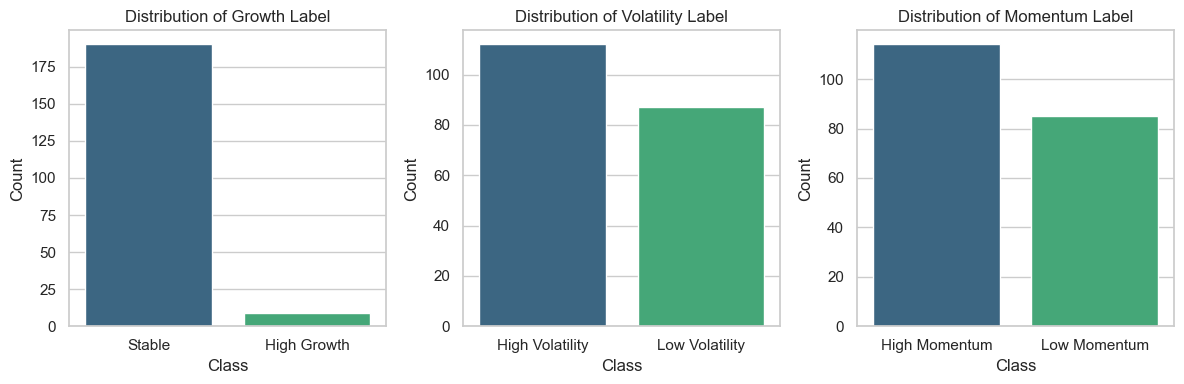

In [28]:
sns.set(style="whitegrid")

# Define the columns for the labels
label_columns = ['Growth Label', 'Volatility Label', 'Momentum Label']

# Initialize a figure for the plots
plt.figure(figsize=(12, 4))

# Loop through each label column and plot
for i, col in enumerate(label_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Class')
    plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show() 


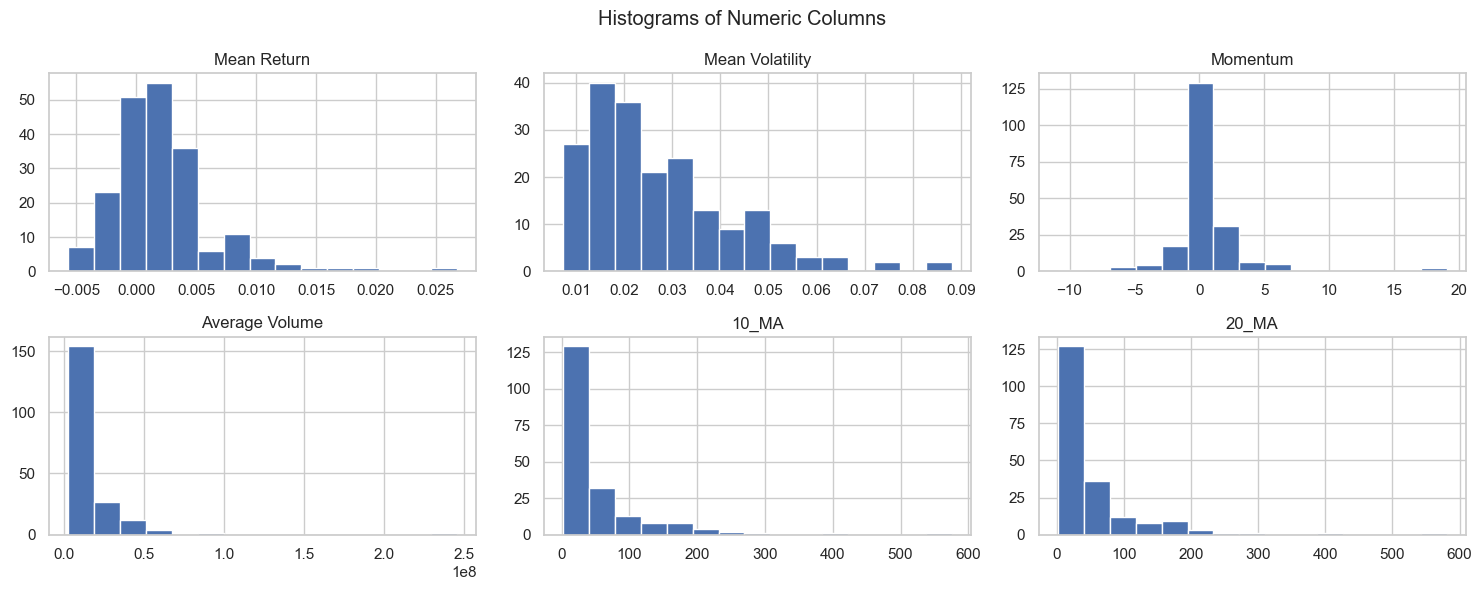

In [29]:
# Univariate Analysis
# Histograms for numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout()
plt.show()

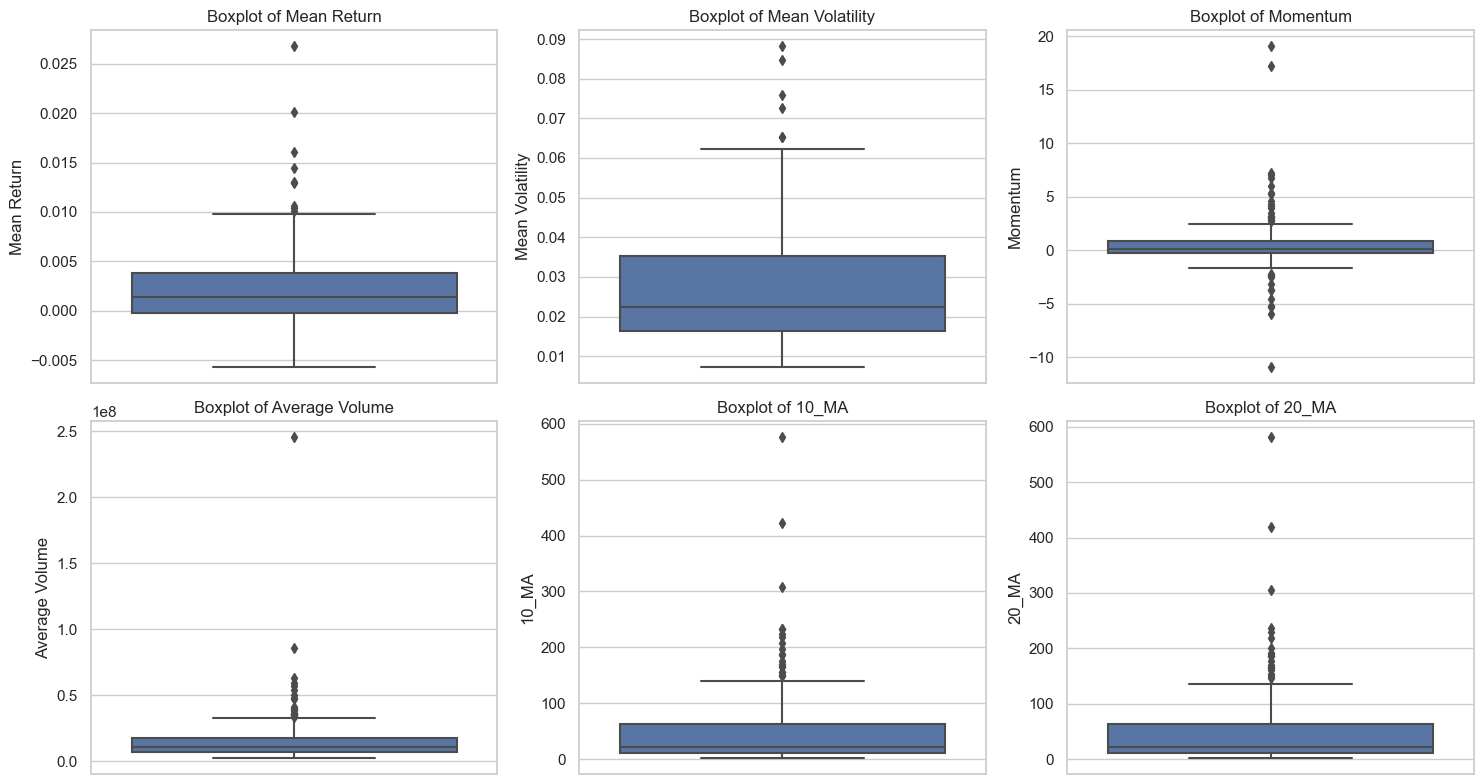

In [30]:
# Box plots to check for outliers in numerical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

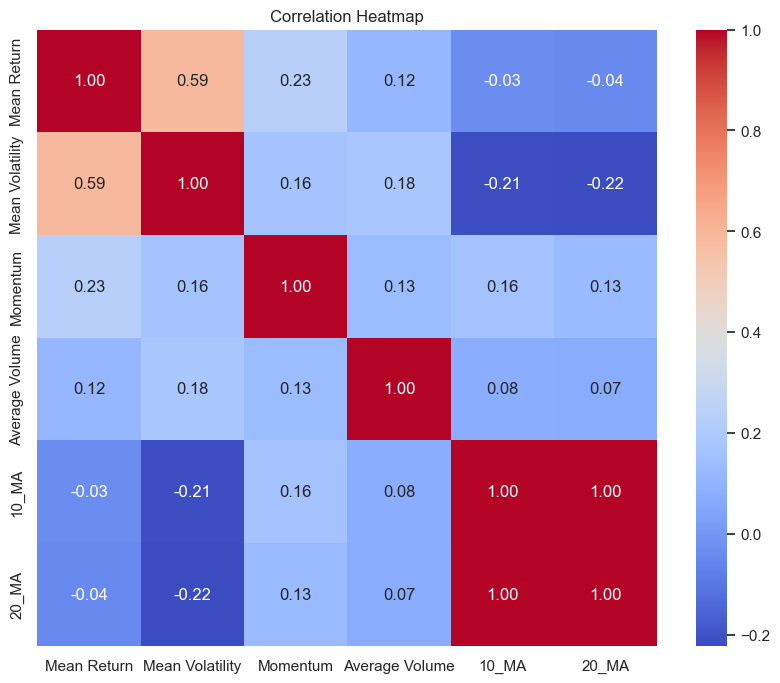

In [31]:
# Bivariate Analysis
# Correlation Heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

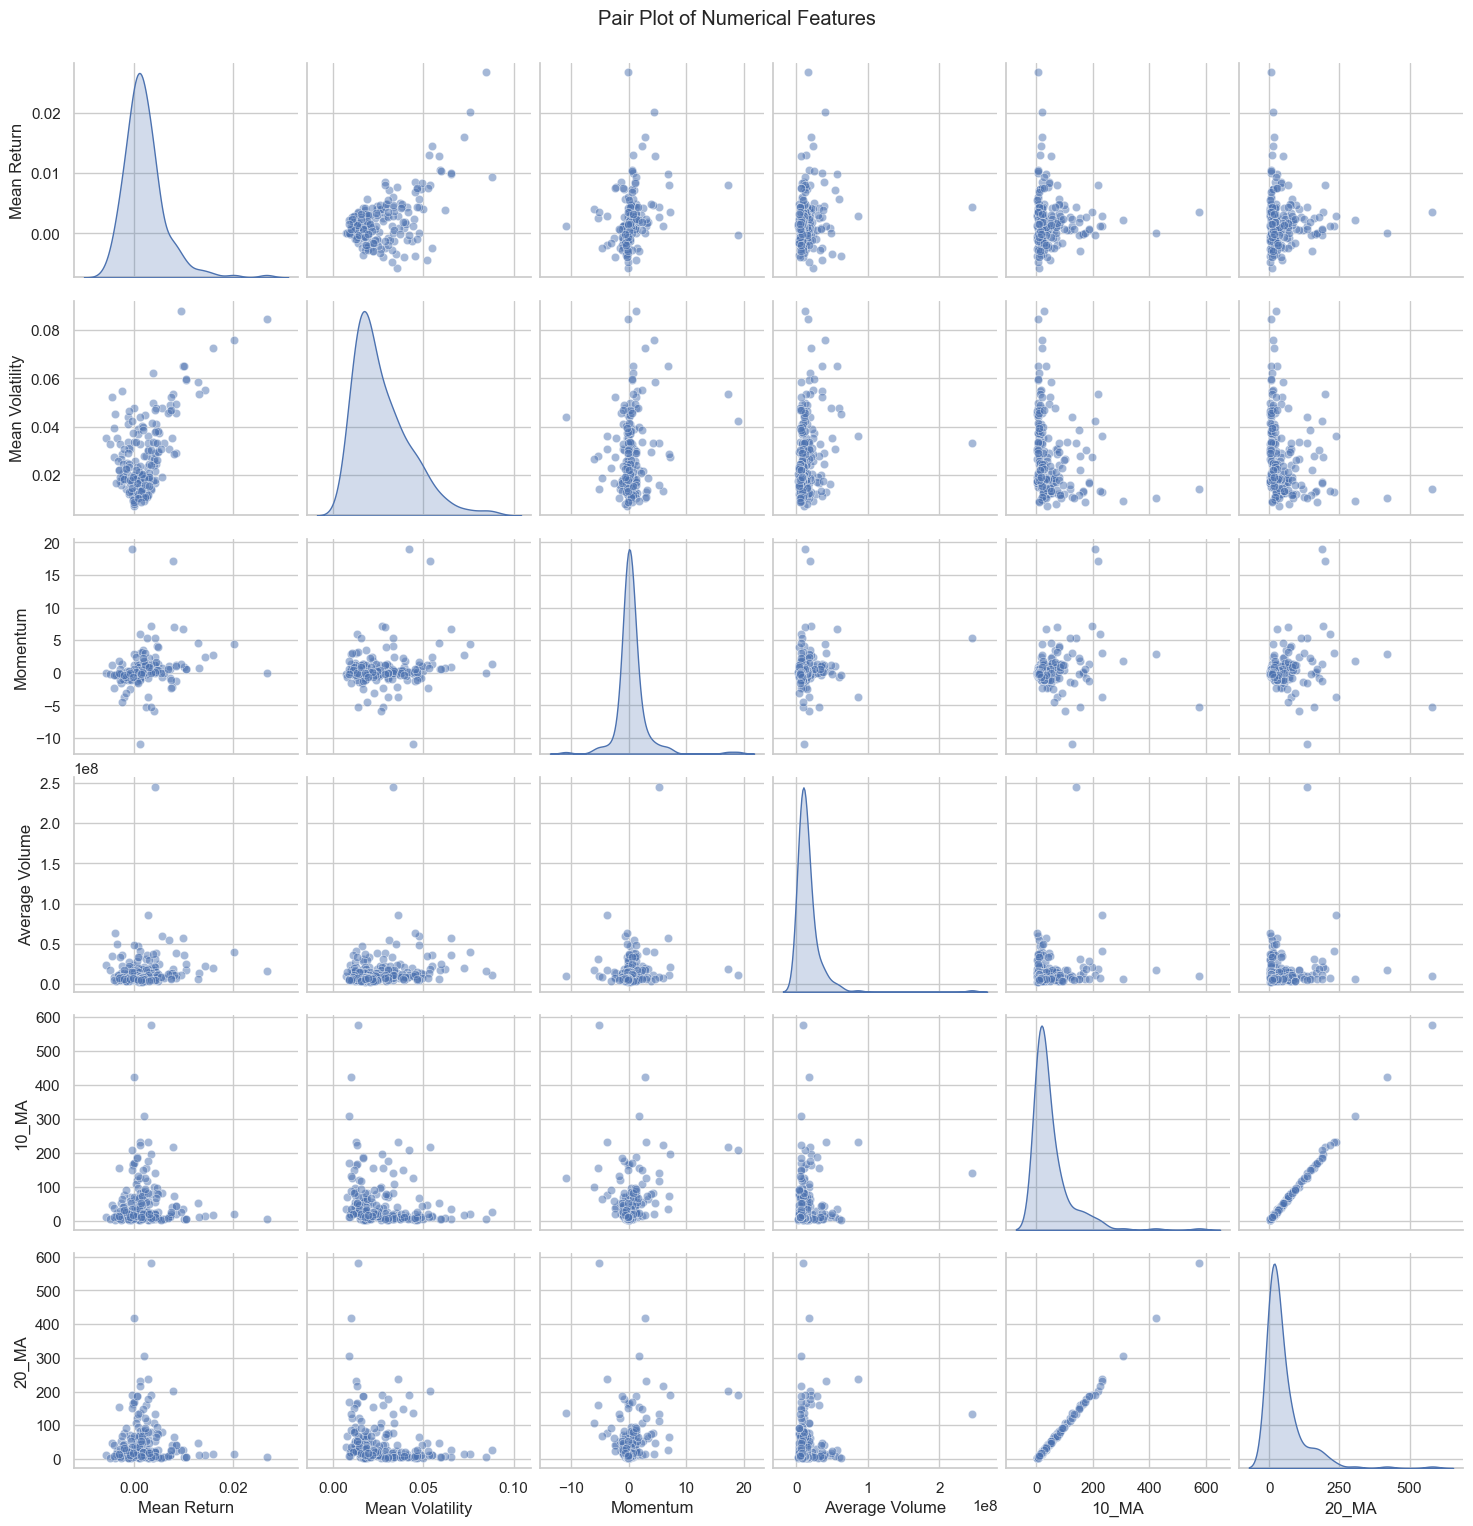

In [32]:
# Scatter plots for pairs of selected numerical features (adjust as necessary)
sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()